## 大規模SAアニーリングTYTANチュートリアル

### シュミレイテッドアニーリング概要
シュミレイテッドアニーリング(SA)とは、組合せ最適化問題の解を求める手法です。  
組合せ最適化問題は、計算理論上NP困難と呼ばれる、組合せが多くなるにつれて計算量が指数関数的に増加してしまう問題があります。  
SAはこのNP困難の問題を解決するわけではなく、組み合わせ最適化問題の最適解(大域最適解)が得られる保証はありません、SAは近似解を求められる手法です。  

しかし、現実問題の多くは、問題の解き方そのものが分からないケースも多く、SAは実用する上では問題のない答えを得られる場合もあります。


### 組合せ最適化問題の解き方
SAで組み合わせ最適化問題を解く際には、コストと制約条件を定義します。  
コストは組合せ最適化問題の解を評価するための数式で、求まる解が良いか悪いかを定義できる数式です。

制約条件は、満たさないと解と認められない条件のことで、こちらも数式で定義します。


### コスト関数の例
0か1をとる変数$q_0,q_1,q_2$があるときに、
隣接する変数の値がすべて1となる変数の組み合わせのコスト関数Cは、隣接する変数の積にマイナスを掛けたもになります。
<br>
$$
C=-q_0q_1-q_0q_2-q_1q_2
$$
<br>

この例ははじめから、求める$q_0,q_1,q_2$の組み合わせは、$\{1,1,1\}$と分かっています。  
このときのコスト関数の値は、$C=-3$となり、$q_0,q_1,q_2$が$\{1,1,1\}$のときに最小値になることが分かります。  
このように、コスト関数は、求める状態が最小になるように定式化した式のことです。  
現実問題を解くときは当然、求める状態が分かっていないために、  
このコスト関数を定式化することで、SAを行うことでコスト関数が最小となるような状態を求めようと働きます。

### 制約条件の例
制約条件とは、たとえコスト関数が最小になったとしても、解とは認められない条件のことです。
コスト関数に制約条件の式を加えることで、制約条件を満たすような、状態を求めることができます。  
コスト関数が、  
<br>
$$
C=4q_0q_1-3q_1q_3+2q_2-q_3
$$  
<br>
で定式化されているときに、制約条件$D$が下記とします。  
<br>
$$
D=(2q_0+q_1+q_2-2)^2
$$  
<br>

制約条件があるときには、コスト関数が最小になるように働きますが、制約条件が2乗で与えられているために、2乗のカッコの中が0になるようにSAが動作します。


コスト関数と制約条件を足した
<br>
$$
H=C+D
$$
<br>
がなるべく最小になるようにSAが動くようになります。

### 実際にTYTANで問題を解いてみる。
制約条件とコスト関数をもとめたら、実際にTYTANに解かせてみます。  
はじめに、TYTANモジュールをインストールします。

In [2]:
!pip install git+https://github.com/tytansdk/tytan.git

  Created wheel for tytan: filename=tytan-0.0.5-py3-none-any.whl size=14786 sha256=7141df08cbb113606e5a35720825643e86593d067bd54621ac78aa1a8506d618
  Stored in directory: /tmp/pip-ephem-wheel-cache-j88dnidw/wheels/82/f8/64/a3349ef2564f4525272b3140f2bfae4619c86ddb9caa137ecd
Successfully built tytan
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [3]:
from tytan import *
import sympy as sym

# 変数を定義 q_0, q_1, q_2, q_3
q = sym.symbols("q_{0:4}")

#式を記述
#コスト関数
C= 4*q[0]*q[1]-3*q[1]*q[3]+2*q[2]-q[3]
#制約条件
D=(2*q[0]+q[1]+q[2]-2)**2

#式を結合
H = C+5*D

# Compileクラスを使用して、QUBOを取得
Q, offset = qubo.Compile(H).get_qubo()

API_KEY = "API key"

# サンプラーを選択
solver = sampler.NQSSampler()

# 計算
result = solver.run(Q, api_key=API_KEY)
print(result)

{'energy': -22.0, 'result': {'q_{0}': 0, 'q_{1}': 1, 'q_{2}': 1, 'q_{3}': 1}, 'time': 3.744239091873169}


### 結果の確認
結果をみると、energyとありますが、これは、求まった状態に対するコスト関数と制約条件の式の数値が表示されています。  

状態は、$\{q_0,q_1,q_2,q_3  \}=\{0,1,1,1\}$です。
制約条件
$$
D=(2q_0+q_1+q_2-2)^2  
$$
$$
=(2*0+1+1-2)^2=0
$$
と0になり制約が満たされていることが分かります。

このようにTYTANによるSAでは、解きたい問題のコストと制約を与えるだけで、その式に応じた結果が得られます。  
このあとは、現実問題で応用できそうな組み合わせ問題を解く例を見ていきます。

### 重み付けについて
コスト関数$C$と制約条件$D$を足したものを入力として、SAのソルバーに渡します。  
問題によっては、制約条件もしくは、コストにも重み付けをする必要があります。  

先ほどのコスト$C$と制約条件$D$に重み$A,B$を付けます。  
<br>  

コスト関数$C=4q_0q_1-3q_1q_3+2q_2-q_3$
<br>  

制約条件$D=(2q_0+q_1+q_2-2)^2$
<br>  

合計$H=A \times C+B \times D$
<br>  

コスト関数の重み$A$を大きくするとSAは、コスト関数を重視した状態を見つけるように働きます。  
対して、制約条件の重み$B$を大きくすると、制約条件を満たしていないときの状態に対して大きな値をとるようになるために、最終的に制約条件を満たす状態を探しやすくなります。

重みを変えたときの関数の形状を確認すると、はじめ制約条件に重みを付けていないときは、横軸の10の位置$\{1,0,1,0\}$のときに最小値となっているが、この状態では、制約$D$を満たしていません。  
そこで、制約条件の重みとして4を$D$にかけることで、関数の値を大きくして、制約を満たす状態(横軸9)に行くようにする。

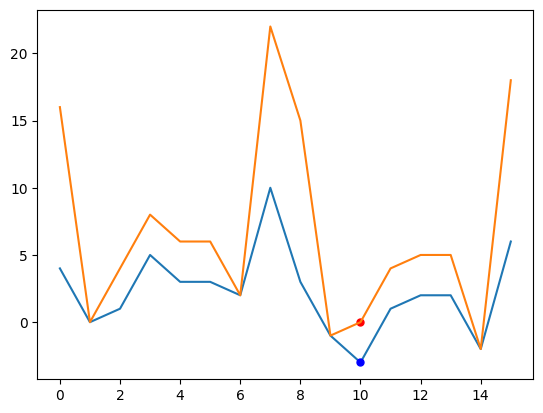

In [9]:
import matplotlib.pyplot as plt

#x軸とx軸を設定（今回はリストを用いて表現します。）
X = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for q3 in range(2):
  for q2 in range(2):
    for q1 in range(2):
      for q0 in range(2): 
        Y[8*q3+4*q2+2*q1+q0]=(4*q0*q1-3*q1*q3+2*q2-q3)+1*(2*q0+q1+q2-2)**2


plt.plot(X, Y)

for q3 in range(2):
  for q2 in range(2):
    for q1 in range(2):
      for q0 in range(2): 
        Y[8*q3+4*q2+2*q1+q0]=(4*q0*q1-3*q1*q3+2*q2-q3)+4*(2*q0+q1+q2-2)**2

plt.plot(10, 0, marker='.',color = 'red' ,markersize=10) 
plt.plot(10, -3, marker='.',color = 'blue' ,markersize=10) 
plt.plot(X, Y)

#グラフ出力
plt.show()

今回の問題は、状態をすべて列挙することができるために、一覧で確認することもできます。  

In [ ]:
import pandas as pd

list1=list()
list1 = [[0 for i in range(7)] for j in range(16)]

#重みA
A=1
#重みB
B=4
k=0
for q3 in range(2):
  for q2 in range(2):
    for q1 in range(2):
      for q0 in range(2): 
        #Y[8*q3+4*q2+2*q1+q0]=(4*q0*q1-3*q1*q3+2*q2-q3)+10*(2*q0+q1+q2-2)**2
        list1[k][0]=q3
        list1[k][1]=q2
        list1[k][2]=q1
        list1[k][3]=q0
        list1[k][4]=A*(4*q0*q1-3*q1*q3+2*q2-q3)
        list1[k][5]=B*(2*q0+q1+q2-2)**2
        list1[k][6]=list1[k][4]+list1[k][5]
        k+=1


columns1 = ["q3", "q2", "q1","q0","コスト","制約","合計"]
pd.DataFrame(data=list1,  columns=columns1)


,q3,q2,q1,q0,コスト,制約,合計
0,0,0,0,0,0,16,16
1,0,0,0,1,0,0,0
2,0,0,1,0,0,4,4
3,0,0,1,1,4,4,8
4,0,1,0,0,2,4,6
5,0,1,0,1,2,4,6
6,0,1,1,0,2,0,2
7,0,1,1,1,6,16,22
8,1,0,0,0,-1,16,15
9,1,0,0,1,-1,0,-1
